In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def to_torch(X,mode=0):
    if mode==0:
        return torch.from_numpy(X.astype(np.float32))

    elif mode==1:
        return torch.from_numpy(X.astype(np.int64))


# Define a function to convert a NumPy array to a PyTorch tensor
def to_torch(X, mode=0):
    if mode == 0:
        # Convert the NumPy array to a float32 PyTorch tensor
        return torch.from_numpy(X.astype(np.float32))

    elif mode == 1:
        # Convert the NumPy array to an int64 PyTorch tensor
        return torch.from_numpy(X.astype(np.int64))


In [14]:
import torch
import torch.nn as nn
import numpy as np

# Define a function to create a neural network model and train it.
def create_model_and_train(X_train, Y_train, n_epochs=1000):

    # Create a neural network model with a single linear layer
    # 64 input neurons and 3 output neurons
    model = nn.Sequential(
        nn.Linear(64, 3),
    )

    # Define the loss function and the optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Convert the input and target training data to PyTorch tensors
    inputs = to_torch(X_train, mode=0)
    targets = to_torch(Y_train, mode=1)

    # Initialize an array to store training losses
    train_losses = np.zeros(n_epochs)

    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calculate the loss using cross-entropy and target labels
        loss = criterion(outputs, torch.max(targets, 1)[1])
        train_losses[it] = loss.item()

        # Backpropagation and optimization step
        loss.backward()
        optimizer.step()

        # Print the training loss
        print(f"Epoch {it + 1}/{n_epochs}, Train Loss: {loss.item():.4f}")

    return model, train_losses


In [11]:
# Define a function to plot a metric from a dataset.
def plot_metric(data, metric):

    # Create a line plot of the data
    plt.plot(data, label=f"train {metric}")

    # Display a legend to label the plot
    plt.legend()

    # Show the plot
    plt.show()


In [12]:
X = np.array([
    np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]),
    np.array([0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0, 0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
    np.array([0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
])

Y = np.array([
    np.array([0,0,1]),
    np.array([0,1,0]),
    np.array([1,0,0]),
])

In [15]:
# Call the create_model_and_train function to create and train a neural network model
model, train_losses = create_model_and_train(X, Y, n_epochs=100)

Epoch 1/100, Train Loss: 1.0541
Epoch 2/100, Train Loss: 0.9651
Epoch 3/100, Train Loss: 0.8810
Epoch 4/100, Train Loss: 0.8022
Epoch 5/100, Train Loss: 0.7290
Epoch 6/100, Train Loss: 0.6613
Epoch 7/100, Train Loss: 0.5991
Epoch 8/100, Train Loss: 0.5422
Epoch 9/100, Train Loss: 0.4904
Epoch 10/100, Train Loss: 0.4435
Epoch 11/100, Train Loss: 0.4012
Epoch 12/100, Train Loss: 0.3631
Epoch 13/100, Train Loss: 0.3290
Epoch 14/100, Train Loss: 0.2985
Epoch 15/100, Train Loss: 0.2713
Epoch 16/100, Train Loss: 0.2469
Epoch 17/100, Train Loss: 0.2252
Epoch 18/100, Train Loss: 0.2059
Epoch 19/100, Train Loss: 0.1886
Epoch 20/100, Train Loss: 0.1732
Epoch 21/100, Train Loss: 0.1595
Epoch 22/100, Train Loss: 0.1472
Epoch 23/100, Train Loss: 0.1362
Epoch 24/100, Train Loss: 0.1263
Epoch 25/100, Train Loss: 0.1175
Epoch 26/100, Train Loss: 0.1096
Epoch 27/100, Train Loss: 0.1024
Epoch 28/100, Train Loss: 0.0959
Epoch 29/100, Train Loss: 0.0901
Epoch 30/100, Train Loss: 0.0848
Epoch 31/100, Train

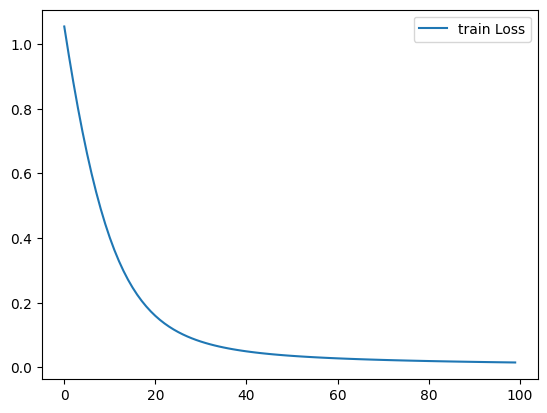

In [16]:
plot_metric(train_losses, "Loss")

In [18]:
# convert inputs to tensor
inputs  = to_torch(X,mode=0)

In [19]:
# predict
model(inputs)

tensor([[-0.8124, -1.6665,  3.5145],
        [-1.8223,  3.2671, -2.5227],
        [ 3.7212, -1.9592, -0.5069]], grad_fn=<AddmmBackward0>)